<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(3_2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.2_n250.csv',
 'data_multi_delta_3.2_n120.csv',
 'data_multi_delta_3.2_n60.csv',
 'data_multi_delta_3.2_n30.csv',
 'data_multi_delta_3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,84.882960,-583.317967,-488.435006,-274.479799,-213.955207
1,0.0,1.0,45.138361,-1170.108106,-1114.969745,-20.573530,-1094.396216
2,0.0,2.0,86.712360,-2175.029082,-2078.316722,-286.166821,-1792.149901
3,0.0,3.0,25.100365,-124.124344,-89.023978,107.438148,-196.462126
4,0.0,4.0,50.008146,-427.247066,-367.238921,-51.683889,-315.555031
...,...,...,...,...,...,...,...
19995,999.0,15.0,38.178313,-376.844008,-328.665695,39.178528,-367.844222
19996,999.0,16.0,81.123977,856.311357,947.435334,105.095565,842.339769
19997,999.0,17.0,62.387494,518.104802,590.492296,76.337051,514.155244
19998,999.0,18.0,98.083989,1304.820834,1412.904823,131.127383,1281.777440


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,84.882960,-583.317967,-488.435006,-274.479799,-213.955207
1,0.0,1.0,45.138361,-1170.108106,-1114.969745,-20.573530,-1094.396216
2,0.0,2.0,86.712360,-2175.029082,-2078.316722,-286.166821,-1792.149901
3,0.0,3.0,25.100365,-124.124344,-89.023978,107.438148,-196.462126
4,0.0,4.0,50.008146,-427.247066,-367.238921,-51.683889,-315.555031
...,...,...,...,...,...,...,...
19995,999.0,15.0,38.178313,-376.844008,-328.665695,39.178528,-367.844222
19996,999.0,16.0,81.123977,856.311357,947.435334,105.095565,842.339769
19997,999.0,17.0,62.387494,518.104802,590.492296,76.337051,514.155244
19998,999.0,18.0,98.083989,1304.820834,1412.904823,131.127383,1281.777440


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    84.882960  -583.317967  -488.435006 -274.479799  -213.955207
      1.0    45.138361 -1170.108106 -1114.969745  -20.573530 -1094.396216
      2.0    86.712360 -2175.029082 -2078.316722 -286.166821 -1792.149901
      3.0    25.100365  -124.124344   -89.023978  107.438148  -196.462126
      4.0    50.008146  -427.247066  -367.238921  -51.683889  -315.555031
...                ...          ...          ...         ...          ...
999.0 15.0   38.178313  -376.844008  -328.665695   39.178528  -367.844222
      16.0   81.123977   856.311357   947.435334  105.095565   842.339769
      17.0   62.387494   518.104802   590.492296   76.337051   514.155244
      18.0   98.083989  1304.820834  1412.904823  131.127383  1281.777440
      19.0   54.692365   318.867789   383.560154   64.525845   319.034310

[20000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    84.882960  -583.317967  -488.435006 -274.479799  -213.955207
      1.0    45.138361 -1170.108106 -1114.969745  -20.573530 -1094.396216
      2.0    86.712360 -2175.029082 -2078.316722 -286.166821 -1792.149901
      3.0    25.100365  -124.124344   -89.023978  107.438148  -196.462126
      4.0    50.008146  -427.247066  -367.238921  -51.683889  -315.555031
...                ...          ...          ...         ...          ...
999.0 15.0   38.178313  -376.844008  -328.665695   39.178528  -367.844222
      16.0   81.123977   856.311357   947.435334  105.095565   842.339769
      17.0   62.387494   518.104802   590.492296   76.337051   514.155244
      18.0   98.083989  1304.820834  1412.904823  131.127383  1281.777440
      19.0   54.692365   318.867789   383.560154   64.525845   319.034310

[20000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,84.882960,-583.317967,-488.435006,-274.479799,-213.955207
1,0.0,1.0,45.138361,-1170.108106,-1114.969745,-20.573530,-1094.396216
2,0.0,2.0,86.712360,-2175.029082,-2078.316722,-286.166821,-1792.149901
3,0.0,3.0,25.100365,-124.124344,-89.023978,107.438148,-196.462126
4,0.0,4.0,50.008146,-427.247066,-367.238921,-51.683889,-315.555031
...,...,...,...,...,...,...,...
19995,999.0,15.0,38.178313,-376.844008,-328.665695,39.178528,-367.844222
19996,999.0,16.0,81.123977,856.311357,947.435334,105.095565,842.339769
19997,999.0,17.0,62.387494,518.104802,590.492296,76.337051,514.155244
19998,999.0,18.0,98.083989,1304.820834,1412.904823,131.127383,1281.777440


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    84.882960  -583.317967  -488.435006 -274.479799  -213.955207
      1.0    45.138361 -1170.108106 -1114.969745  -20.573530 -1094.396216
      2.0    86.712360 -2175.029082 -2078.316722 -286.166821 -1792.149901
      3.0    25.100365  -124.124344   -89.023978  107.438148  -196.462126
      4.0    50.008146  -427.247066  -367.238921  -51.683889  -315.555031
...                ...          ...          ...         ...          ...
999.0 15.0   38.178313  -376.844008  -328.665695   39.178528  -367.844222
      16.0   81.123977   856.311357   947.435334  105.095565   842.339769
      17.0   62.387494   518.104802   590.492296   76.337051   514.155244
      18.0   98.083989  1304.820834  1412.904823  131.127383  1281.777440
      19.0   54.692365   318.867789   383.560154   64.525845   319.034310

[20000 rows x 5 columns]

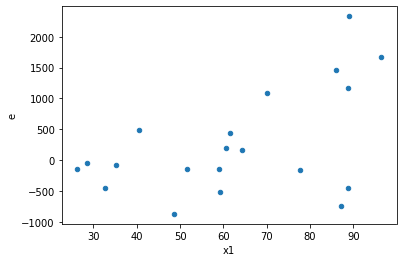

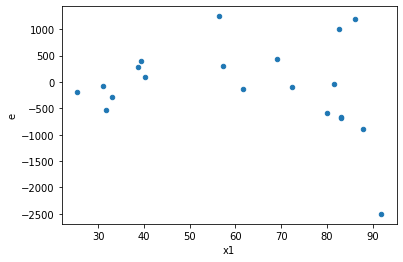

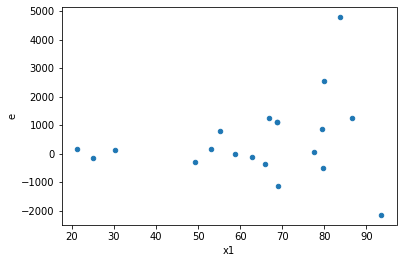

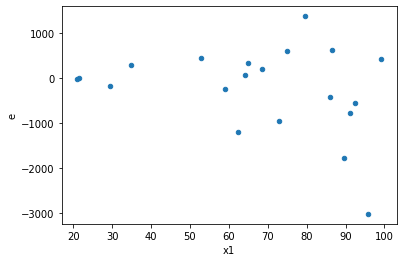

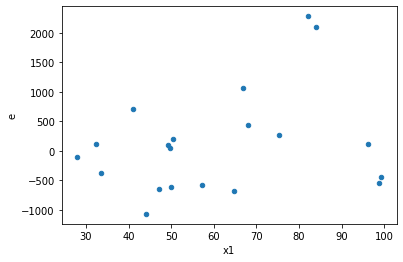

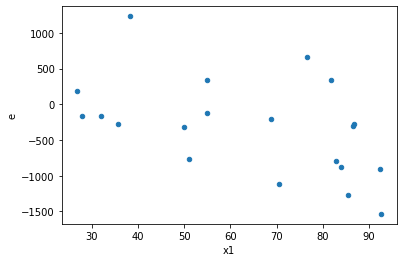

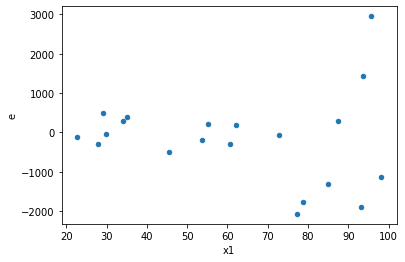

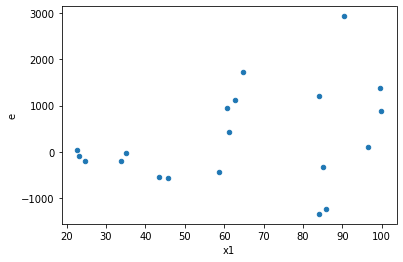

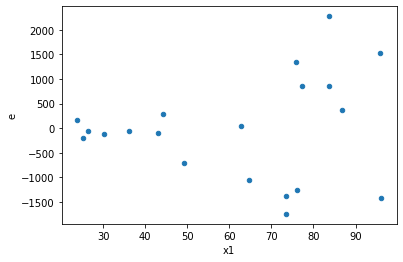

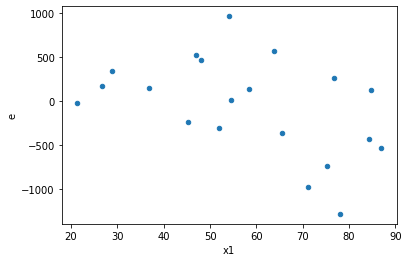

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,7.0,7.0,334807.3628971376,10330331.026481478,47829.62327101966,1475761.5752116397,30.854551516106447,0.00019196824558620484,0.9999040158772069,9.598412279310242e-05,Reject005=0 : Heteroscedasticity
4.0,7.0,7.0,224234.47874180626,17362597.22749551,32033.49696311518,2480371.0324993585,77.43054201529637,8.504078853555086e-06,0.9999957479605732,4.252039426777543e-06,Reject005=0 : Heteroscedasticity
6.0,7.0,7.0,749702.1197375741,14144164.327980597,107100.30281965344,2020594.903997228,18.866378999877476,0.0009647956201881414,0.9995176021899059,0.0004823978100940707,Reject005=0 : Heteroscedasticity
7.0,7.0,7.0,581844.0998266289,6295562.475924764,83120.58568951841,899366.0679892519,10.82001601081912,0.005537156278981437,0.9972314218605093,0.0027685781394907183,Reject005=0 : Heteroscedasticity
8.0,7.0,7.0,1449495.118346191,7991516.755891581,207070.731192313,1141645.2508416544,5.513310569137717,0.03850762445960276,0.9807461877701986,0.01925381222980138,Reject005=0 : Heteroscedasticity
9.0,7.0,7.0,3016583.8602619306,4352515.0422330275,430940.5514659901,621787.8631761468,1.4428622719791047,0.640648381677964,0.679675809161018,0.320324190838982,Reject005=1 : Homoscedasticity
10.0,7.0,7.0,990369.8720786029,8258669.485366205,141481.41029694327,1179809.9264808863,8.338974880195806,0.01205127994571975,0.9939743600271401,0.006025639972859875,Reject005=0 : Heteroscedasticity
12.0,7.0,7.0,757224.6609953605,33774525.05766633,108174.95157076578,4824932.15109519,44.60304424484831,5.571844194474096e-05,0.9999721407790276,2.785922097237048e-05,Reject005=0 : Heteroscedasticity
14.0,7.0,7.0,2030485.1228825501,6432297.208984088,290069.3032689357,918899.6012834412,3.1678622692160223,0.15115666761380053,0.9244216661930997,0.07557833380690027,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,7.0,6863305.620388108,482492.7858901258,980472.2314840155,68927.54084144653,0.07030034979891243,0.0023736278464816045,Reject005=0 : Heteroscedasticity
1.0,7.0,7.0,334807.3628971376,10330331.026481478,47829.62327101966,1475761.5752116397,30.854551516106447,0.00019196824558620484,Reject005=0 : Heteroscedasticity
2.0,7.0,7.0,17541945.877079435,463713.0442303119,2505992.268154205,66244.72060433027,0.02643452713169103,9.708048487907e-05,Reject005=0 : Heteroscedasticity
3.0,7.0,7.0,18065011.198810093,2061706.060084468,2580715.885544299,294529.437154924,0.11412702917229679,0.01042087160895072,Reject005=0 : Heteroscedasticity
4.0,7.0,7.0,224234.47874180626,17362597.22749551,32033.49696311518,2480371.0324993585,77.43054201529637,8.504078853555086e-06,Reject005=0 : Heteroscedasticity
5.0,7.0,7.0,15682898.70447383,2100887.5108911917,2240414.100639119,300126.7872701702,0.1339604081158718,0.016605663535761414,Reject005=0 : Heteroscedasticity
6.0,7.0,7.0,749702.1197375741,14144164.327980597,107100.30281965344,2020594.903997228,18.866378999877476,0.0009647956201881414,Reject005=0 : Heteroscedasticity
7.0,7.0,7.0,581844.0998266289,6295562.475924764,83120.58568951841,899366.0679892519,10.82001601081912,0.005537156278981437,Reject005=0 : Heteroscedasticity
8.0,7.0,7.0,1449495.118346191,7991516.755891581,207070.731192313,1141645.2508416544,5.513310569137717,0.03850762445960276,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    799
Reject005=1 : Homoscedasticity      201
Name: Result_test, dtype: int64